In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("hw5.ipynb")

# CPSC 330 - Applied Machine Learning 

## Homework 5: Putting it all together 
### Associated lectures: All material till lecture 13 

**Due date: See the [Calendar](https://htmlpreview.github.io/?https://github.com/UBC-CS/cpsc330/blob/master/docs/calendar.html).**

## Table of contents
0. [Submission instructions](#si)
1. [Understanding the problem](#1)
2. [Data splitting](#2)
3. [EDA](#3)
4. (Optional) [Feature engineering](#4)
5. [Preprocessing and transformations](#5) 
6. [Baseline model](#6)
7. [Linear models](#7)
8. [Different models](#8)
9. (Optional) [Feature selection](#9)
10. [Hyperparameter optimization](#10)
11. [Interpretation and feature importances](#11) 
12. [Results on the test set](#12)
13. [Summary of the results](#13)
14. (Optional) [Your takeaway from the course](#15)

## Submission instructions <a name="si"></a>
<hr>
rubric={points:4}

You will receive marks for correctly submitting this assignment. To submit this assignment, follow the instructions below:

- **You may work on this assignment in a group (group size <= 4) and submit your assignment as a group.** 
- Below are some instructions on working as a group.  
    - The maximum group size is 4. 
    - You can choose your own group members. 
    - Use group work as an opportunity to collaborate and learn new things from each other. 
    - Be respectful to each other and make sure you understand all the concepts in the assignment well. 
    - It's your responsibility to make sure that the assignment is submitted by one of the group members before the deadline. [Here](https://help.gradescope.com/article/m5qz2xsnjy-student-add-group-members) are some instructions on adding group members in Gradescope.  
- Be sure to follow the [general lab instructions](https://ubc-mds.github.io/resources_pages/general_lab_instructions/).
- Upload the .ipynb file to Gradescope.
- **If the .ipynb file is too big or doesn't render on Gradescope for some reason, also upload a pdf or html in addition to the .ipynb.** 
- Make sure that your plots/output are rendered properly in Gradescope.

## Imports

In [2]:
import os

%matplotlib inline
import string
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import shap
import eli5
from lightgbm.sklearn import LGBMClassifier
from sklearn.model_selection import (
    GridSearchCV,
    RandomizedSearchCV,
    cross_val_score,
    cross_validate,
    train_test_split,
)
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.dummy import DummyClassifier, DummyRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score, cross_validate, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.svm import SVC, SVR
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.linear_model import LogisticRegression

## Introduction <a name="in"></a>

In this homework you will be working on an open-ended mini-project, where you will put all the different things you have learned so far together to solve an interesting problem.

A few notes and tips when you work on this mini-project: 

#### Tips
1. This mini-project is open-ended, and while working on it, there might be some situations where you'll have to use your own judgment and make your own decisions (as you would be doing when you work as a data scientist). Make sure you explain your decisions whenever necessary. 
2. **Do not include everything you ever tried in your submission** -- it's fine just to have your final code. That said, your code should be reproducible and well-documented. For example, if you chose your hyperparameters based on some hyperparameter optimization experiment, you should leave in the code for that experiment so that someone else could re-run it and obtain the same hyperparameters, rather than mysteriously just setting the hyperparameters to some (carefully chosen) values in your code. 
3. If you realize that you are repeating a lot of code try to organize it in functions. Clear presentation of your code, experiments, and results is the key to be successful in this lab. You may use code from lecture notes or previous lab solutions with appropriate attributions. 

#### Assessment
We plan to grade fairly and leniently. We don't have some secret target score that you need to achieve to get a good grade. **You'll be assessed on demonstration of mastery of course topics, clear presentation, and the quality of your analysis and results.** For example, if you just have a bunch of code and no text or figures, that's not good. If you do a bunch of sane things and get a lower accuracy than your friend, don't sweat it.


#### A final note
Finally, this style of this "project" question is different from other assignments. It'll be up to you to decide when you're "done" -- in fact, this is one of the hardest parts of real projects. But please don't spend WAY too much time on this... perhaps "a few hours" (15-20 hours???) is a good guideline for this project . Of course if you're having fun you're welcome to spend as much time as you want! But, if so, try not to do it out of perfectionism or getting the best possible grade. Do it because you're learning and enjoying it. Students from the past cohorts have found such kind of labs useful and fun and I hope you enjoy it as well. 

<br><br>

<!-- BEGIN QUESTION -->

## 1. Pick your problem and explain the prediction problem <a name="1"></a>
<hr>
rubric={points:3}

In this mini project, you will be working on a classification problem of predicting whether a credit card client will default or not. 
For this problem, you will use [Default of Credit Card Clients Dataset](https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset). In this data set, there are 30,000 examples and 24 features, and the goal is to estimate whether a person will default (fail to pay) their credit card bills; this column is labeled "default.payment.next.month" in the data. The rest of the columns can be used as features. You may take some ideas and compare your results with [the associated research paper](https://www.sciencedirect.com/science/article/pii/S0957417407006719), which is available through [the UBC library](https://www.library.ubc.ca/). 

**Your tasks:**

1. Spend some time understanding the problem and what each feature means. You can find this information in the documentation on [the dataset page on Kaggle](https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset). Write a few sentences on your initial thoughts on the problem and the dataset. 
2. Download the dataset and read it as a pandas dataframe. 

<div class="alert alert-warning">
    
Solution_1
    
</div>

In [3]:
credit_card_df = pd.read_csv("data/UCI_Credit_Card.csv")

credit_card_df.info()
credit_card_df.describe()
credit_card_df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


1. Based on the dataset desription, the dataset collects information on credit card clients in Taiwan. We have information about the client (i.e. age, sex, whether or not they're married, etc.) as well as their payment records/history. Credit card companies would probably like to have some sort of metric or prediction if their client would be able to sucessfully pay their credit card on time. This information could then allow the company to determine if they should offer more services to the client like a higher credit card limit, more credit card options (credit card upgrades), etc.

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 2. Data splitting <a name="2"></a>
<hr>
rubric={points:2}

**Your tasks:**

1. Split the data into train (70%) and test (30%) portions with `random_state=123`.

> If your computer cannot handle training on 70% training data, make the test split bigger.  

<div class="alert alert-warning">
    
Solution_2
    
</div>

In [4]:
X = credit_card_df.drop(columns=["default.payment.next.month"])
y = credit_card_df["default.payment.next.month"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

X

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
1,2,120000.0,2,2,2,26,-1,2,0,0,...,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
2,3,90000.0,2,2,2,34,0,0,0,0,...,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
3,4,50000.0,2,2,1,37,0,0,0,0,...,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,76304.0,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 3. EDA <a name="3"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Perform exploratory data analysis on the train set.
2. Include at least two summary statistics and two visualizations that you find useful, and accompany each one with a sentence explaining it.
3. Summarize your initial observations about the data. 
4. Pick appropriate metric/metrics for assessment. 

<div class="alert alert-warning">
    
Solution_3
    
</div>

In [5]:
# print(X.isna().any())
# print(X.describe())

1. We can drop column ID since the ID is irrelevant to the current problem and may affect the accuracy of the model. We also have a a mix of different categorical columns (some can use OHE and some can use Ordinal encoding) as well as numerical columns. In addition, none of the values in the dataset have NaN/null values.

2. See below

3. 

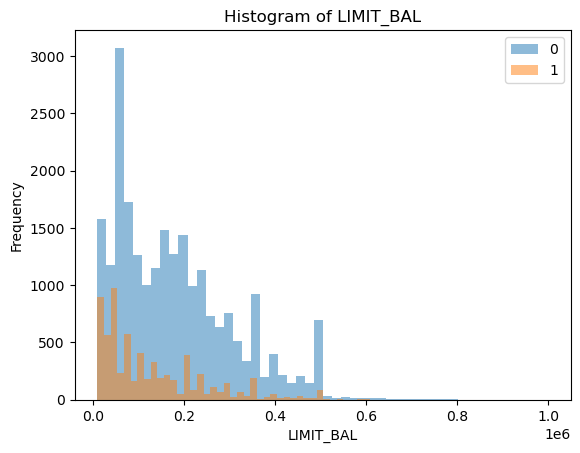

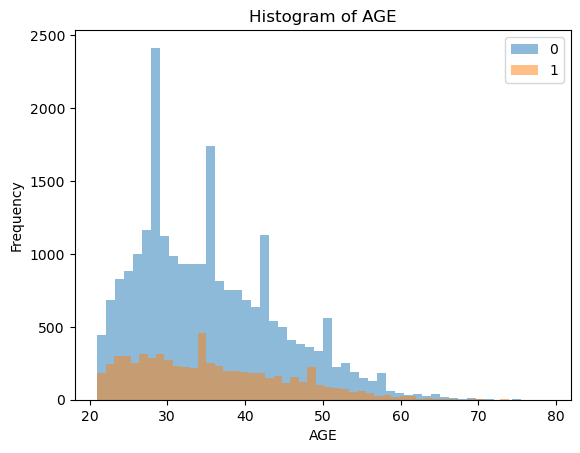

In [6]:
# credit_card_df.hist(bins=50, figsize=(20, 15))
# features = credit_card_df.columns
features = ["LIMIT_BAL", "AGE"]
target = "default.payment.next.month"

# ax = credit_card_df.groupby(target)["LIMIT_BAL"].plot.hist(bins=50, alpha=0.5, legend=True)
# plt.xlabel("LIMIT_BAL")
# plt.title("Histogram of AGE")
# plt.show()

# ax = credit_card_df.groupby("EDUCATION")["LIMIT_BAL"].plot.hist(bins=50, alpha=0.5, legend=True)
# plt.xlabel("LIMIT_BAL")
# plt.title("Histogram of LIMIT_BAL")
# plt.show()

for feat in features:
    ax = credit_card_df.groupby(target)[feat].plot.hist(bins=50, alpha=0.5, legend=True)
    plt.xlabel(feat)
    plt.title("Histogram of " + feat)
    plt.show()
    

<!-- BEGIN QUESTION -->

## (Optional) 4. Feature engineering <a name="4"></a>
<hr>
rubric={points:1}

**Your tasks:**

1. Carry out feature engineering. In other words, extract new features relevant for the problem and work with your new feature set in the following exercises. You may have to go back and forth between feature engineering and preprocessing. 

<div class="alert alert-warning">
    
Solution_4
    
</div>

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 5. Preprocessing and transformations <a name="5"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Identify different feature types and the transformations you would apply on each feature type. 
2. Define a column transformer, if necessary. 

<div class="alert alert-warning">
    
Solution_5
    
</div>

In [7]:
credit_card_df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [44]:
numeric_feats = ["LIMIT_BAL", "AGE", "BILL_AMT1", "BILL_AMT2", "BILL_AMT3", "BILL_AMT4","BILL_AMT5","BILL_AMT6","PAY_AMT1", "PAY_AMT2","PAY_AMT3","PAY_AMT4","PAY_AMT5","PAY_AMT6"]
drop_feats = ["ID"]


pay_ordinal_feats = ["PAY_0", "PAY_2","PAY_3", "PAY_4", "PAY_5", "PAY_6" ]
pay_ordering = [[-2,-1,0,1,2,3,4,5,6,7,8]] * len(pay_ordinal_feats)


education_ordinal_feats = ["EDUCATION"]
education_ordering = [sorted(credit_card_df["EDUCATION"].unique())]

sorted(credit_card_df["EDUCATION"].unique())
# print(sorted(credit_card_df["PAY_0"].unique()))
# print(sorted(credit_card_df["PAY_2"].unique()))
# print(sorted(credit_card_df["PAY_3"].unique()))
# print(sorted(credit_card_df["PAY_4"].unique()))
# print(sorted(credit_card_df["PAY_5"].unique()))
# print(sorted(credit_card_df["PAY_6"].unique()))
# print(sorted(credit_card_df["EDUCATION"].unique()))
# print(sorted(credit_card_df["MARRIAGE"].unique()))

[0, 1, 2, 3, 4, 5, 6]

In [9]:
categorical_feats = list(
    set(X.columns)
    - set(numeric_feats)
    - set(pay_ordinal_feats)
    - set(education_ordinal_feats)    
    - set(drop_feats)
)

categorical_feats

['MARRIAGE', 'SEX']

In [10]:
# code references content from lecture 10

from sklearn.compose import make_column_transformer

numeric_trans = make_pipeline(StandardScaler())

pay_ordinal_trans = make_pipeline(
    OrdinalEncoder(categories=pay_ordering)
)

education_ordinal_trans = make_pipeline( 
    OrdinalEncoder(categories=education_ordering)
)

categorical_trans = make_pipeline(
    OneHotEncoder(drop="if_binary", handle_unknown="ignore", sparse=False)
)

preprocessor = make_column_transformer(
    ("drop", drop_feats),
    (numeric_trans, numeric_feats),
    (pay_ordinal_trans, pay_ordinal_feats),
    (education_ordinal_trans, education_ordinal_feats),
    (categorical_trans, categorical_feats)
)


In [11]:
preprocessor.fit(X_train)
preprocessor.named_transformers_

{'drop': 'drop',
 'pipeline-1': Pipeline(steps=[('standardscaler', StandardScaler())]),
 'pipeline-2': Pipeline(steps=[('ordinalencoder',
                  OrdinalEncoder(categories=[[-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8],
                                             [-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8],
                                             [-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8],
                                             [-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8],
                                             [-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8],
                                             [-2, -1, 0, 1, 2, 3, 4, 5, 6, 7,
                                              8]]))]),
 'pipeline-3': Pipeline(steps=[('ordinalencoder',
                  OrdinalEncoder(categories=[[0, 1, 2, 3, 4, 5, 6]]))]),
 'pipeline-4': Pipeline(steps=[('onehotencoder',
                  OneHotEncoder(drop='if_binary', handle_unknown='ignore',
                                sparse=False))])}

In [12]:
# code references content from lecture #10

ohe_columns = list(
    preprocessor.named_transformers_["pipeline-4"]
    .named_steps["onehotencoder"]
    .get_feature_names_out(categorical_feats)
)

new_columns = numeric_feats + pay_ordinal_feats + education_ordinal_feats + ohe_columns

X_train_enc = pd.DataFrame(
    preprocessor.transform(X_train), index=X_train.index, columns=new_columns
)

X_train_enc.head()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,...,PAY_3,PAY_4,PAY_5,PAY_6,EDUCATION,MARRIAGE_0,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,SEX_2
16395,1.168355,0.054187,-0.300665,-0.293394,-0.265310,-0.371930,-0.494781,-0.587035,-0.039546,-0.040229,...,2.0,2.0,2.0,2.0,1.0,0.0,0.0,1.0,0.0,1.0
21448,2.090017,-0.597108,-0.685307,-0.679495,0.585444,1.970295,1.805461,1.327534,-0.297166,3.739796,...,1.0,2.0,2.0,2.0,1.0,0.0,0.0,1.0,0.0,1.0
20034,-0.060527,0.922579,-0.696132,-0.688319,-0.681234,-0.670935,-0.661045,-0.650908,-0.333097,-0.270403,...,0.0,0.0,0.0,0.0,3.0,0.0,1.0,0.0,0.0,1.0
25755,-0.367748,-0.597108,0.687456,0.752583,0.835581,0.918719,0.501203,0.144527,-0.115517,-0.018028,...,2.0,2.0,2.0,2.0,2.0,0.0,1.0,0.0,0.0,1.0
1438,-0.905384,2.008070,-0.040230,-0.031399,-0.287429,-0.245237,-0.204599,-0.191104,-0.333097,-0.206185,...,2.0,2.0,2.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 6. Baseline model <a name="6"></a>
<hr>
rubric={points:2}

**Your tasks:**
1. Try `scikit-learn`'s baseline model and report results.

<div class="alert alert-warning">
    
Solution_6
    
</div>

In [13]:
from sklearn.dummy import DummyClassifier
#it doesn't matter which X we use, whether it be the transformed or not, since dummyClassifier only looks at y 
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train)
dummy_clf.predict(X_train)
dummy_clf.score(X_train, y_train)

0.7767619047619048

In [14]:
dummy_clf.score(X_test, y_test)

0.7835555555555556

The training score is 77.67% while the test score is 78.36%. 

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 7. Linear models <a name="7"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Try a linear model as a first real attempt. 
2. Carry out hyperparameter tuning to explore different values for the complexity hyperparameter. 
3. Report cross-validation scores along with standard deviation. 
4. Summarize your results.

<div class="alert alert-warning">
    
Solution_7
    
</div>

In [15]:
from sklearn.linear_model import LogisticRegression

scores_dict = {
    "C": 10.0 ** np.arange(-3, 6, 1),
    "mean_train_scores": [],
    "mean_cv_scores": [],
    "std_train_scores": [],
    "std_cv_scores": [],
}

best_C = 0.001
best_cv_score = 0

for C_val in scores_dict["C"]:
    log_reg_pipe = make_pipeline(preprocessor, LogisticRegression(C=C_val, max_iter=1000, random_state=123))
    scores = cross_validate(log_reg_pipe, X_train, y_train, return_train_score=True)
    if scores["test_score"].mean() > best_cv_score:
        best_cv_score = scores["test_score"].mean()
        best_C = C_val
    scores_dict["mean_train_scores"].append(scores["train_score"].mean())
    scores_dict["mean_cv_scores"].append(scores["test_score"].mean())
    scores_dict["std_train_scores"].append(scores["train_score"].std())
    scores_dict["std_cv_scores"].append(scores["test_score"].std())

print("Best cv score:", best_cv_score)
print("Best C value:", best_C)
results_df = pd.DataFrame(scores_dict)
results_df


Best cv score: 0.8098095238095239
Best C value: 100.0


,C,mean_train_scores,mean_cv_scores,std_train_scores,std_cv_scores
0,0.001,0.801595,0.801810,0.000934,0.002750
1,0.010,0.809321,0.808714,0.001300,0.002057
2,0.100,0.810321,0.809571,0.001108,0.002142
3,1.000,0.810571,0.809667,0.001229,0.002196
4,10.000,0.810571,0.809762,0.001267,0.002193
5,100.000,0.810571,0.809810,0.001267,0.002215
6,1000.000,0.810560,0.809810,0.001248,0.002215
7,10000.000,0.810560,0.809810,0.001248,0.002215
8,100000.000,0.810560,0.809810,0.001262,0.002215


In [16]:
log_model = make_pipeline(preprocessor, LogisticRegression(C=best_C, max_iter=1000, random_state=123))
log_model.fit(X_train, y_train)
score = log_model.score(X_test, y_test)

score

0.8138888888888889

During cross-validation, the highest cv-score us 0.8098095 with a C value of 10. In addition, the standard deviation score is very low which means that the cv-score is stable and is not influenced much by the training phase.


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 8. Different models <a name="8"></a>
<hr>
rubric={points:12}

**Your tasks:**
1. Try at least 3 other models aside from a linear model. One of these models should be a tree-based ensemble model. 
2. Summarize your results in terms of overfitting/underfitting and fit and score times. Can you beat a linear model? 

<div class="alert alert-warning">
    
Solution_8
    
</div>

In [17]:
# First tree - DecisionTreeClassifier
dt_pipe = make_pipeline(preprocessor, DecisionTreeClassifier(max_depth=15))
dt_scores = cross_validate(dt_pipe, X_train, y_train, cv=10, return_train_score=True)

dt_scores_df = pd.DataFrame(dt_scores)
dt_scores_df

,fit_time,score_time,test_score,train_score
0,0.263754,0.005030,0.781429,0.900582
1,0.248646,0.004944,0.782381,0.899947
2,0.250057,0.005510,0.783810,0.899101
3,0.248538,0.005095,0.787619,0.894497
4,0.247662,0.004911,0.779048,0.903016
5,0.247860,0.005394,0.793810,0.897619
6,0.255305,0.005456,0.788571,0.897460
7,0.248951,0.004986,0.770476,0.907143
8,0.246675,0.004952,0.782381,0.901481
9,0.245974,0.005091,0.783810,0.900476


In [18]:
dt_pipe.fit(X_train, y_train)
dt_model_score = dt_pipe.score(X_test, y_test)
dt_model_score

0.7918888888888889

In [19]:
# Second Tree - LGBMClassifier

lgbm_pipe = make_pipeline(preprocessor, LGBMClassifier(random_state=123))
lgbm_scores = cross_validate(lgbm_pipe, X_train, y_train, cv=10, return_train_score=True)

lgbm_scores_df = pd.DataFrame(lgbm_scores)
lgbm_scores_df

,fit_time,score_time,test_score,train_score
0,2.492037,0.008040,0.812857,0.850053
1,1.960498,0.008586,0.820476,0.851111
2,2.412094,0.009180,0.826667,0.847672
3,1.908652,0.009297,0.814286,0.848519
4,2.160678,0.010624,0.821905,0.849630
5,2.146164,0.009832,0.825238,0.848889
6,2.193190,0.009980,0.820000,0.849524
7,2.142098,0.009548,0.823333,0.850688
8,1.605833,0.009189,0.816190,0.850952
9,1.913288,0.008826,0.823810,0.848995


In [20]:
lgbm_pipe.fit(X_train, y_train)
lgbm_model_score = lgbm_pipe.score(X_test, y_test)
lgbm_model_score

0.822

In [21]:
# Third Tree - RandomForestClassifier

rf_n_estimators = 50
rf_max_depth = 3

rf_pipe = make_pipeline(
    preprocessor, 
    RandomForestClassifier(n_estimators=rf_n_estimators, max_depth=rf_max_depth, random_state=123)
)

rf_scores = cross_validate(rf_pipe, X_train, y_train, cv=10, return_train_score=True)
rf_scores_df = pd.DataFrame(rf_scores)
rf_scores_df

,fit_time,score_time,test_score,train_score
0,0.490028,0.010322,0.803810,0.810582
1,0.476879,0.011198,0.813810,0.809259
2,0.486882,0.010717,0.809524,0.808836
3,0.474384,0.010157,0.803333,0.810741
4,0.473140,0.010249,0.805714,0.809312
5,0.473520,0.010079,0.820952,0.807725
6,0.474542,0.010194,0.811429,0.808942
7,0.471040,0.010078,0.809524,0.810423
8,0.476146,0.010099,0.801905,0.811429
9,0.472691,0.010264,0.808571,0.810741


In [22]:
rf_pipe.fit(X_train, y_train)
rf_model_score = rf_pipe.score(X_test, y_test)
rf_model_score

0.8104444444444444

<!-- BEGIN QUESTION -->

## (Optional) 9. Feature selection <a name="9"></a>
<hr>
rubric={points:2}

**Your tasks:**

Make some attempts to select relevant features. You may try `RFECV` or forward selection for this. Do the results improve with feature selection? Summarize your results. If you see improvements in the results, keep feature selection in your pipeline. If not, you may abandon it in the next exercises. 

<div class="alert alert-warning">
    
Solution_9
    
</div>

_Type your answer here, replacing this text._

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 10. Hyperparameter optimization <a name="10"></a>
<hr>
rubric={points:10}

**Your tasks:**

Make some attempts to optimize hyperparameters for the models you've tried and summarize your results. In at least one case you should be optimizing multiple hyperparameters for a single model. You may use `sklearn`'s methods for hyperparameter optimization or fancier Bayesian optimization methods. 
  - [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)   
  - [RandomizedSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)
  - [scikit-optimize](https://github.com/scikit-optimize/scikit-optimize) 

<div class="alert alert-warning">
    
Solution_10
    
</div>

The following answers references code from lecture 8

In [23]:
#1 - Hyperparameter Optimization for DecisionTreeClassifier

dtc_pipe = make_pipeline(preprocessor, DecisionTreeClassifier())

dtc_param_grid = {
    "decisiontreeclassifier__max_depth" : np.arange(2, 50, 1)
}

dtc_grid_search = GridSearchCV(
    dtc_pipe, dtc_param_grid, cv=10, n_jobs=-1, return_train_score=True
)

dtc_grid_search.fit(X_train, y_train)


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('drop',
                                                                         'drop',
                                                                         ['ID']),
                                                                        ('pipeline-1',
                                                                         Pipeline(steps=[('standardscaler',
                                                                                          StandardScaler())]),
                                                                         ['LIMIT_BAL',
                                                                          'AGE',
                                                                          'BILL_AMT1',
                                                                          'BILL_AMT2',
                                                                          'BILL_AMT3',
                                                                          'BILL_AMT4',
                                                                          'BILL_AMT5',
                                                                          'BILL_AMT6',
                                                                          'PAY_AMT1',
                                                                          'PAY_AMT2',
                                                                          'PAY_AMT3',
                                                                          'PAY_AMT4',
                                                                          'PAY_AMT5',
                                                                          'PAY_AMT6']),
                                                                        ('...
                                                                                          OneHotEncoder(drop='if_binary',
                                                                                                        handle_unknown='ignore',
                                                                                                        sparse=False))]),
                                                                         ['MARRIAGE',
                                                                          'SEX'])])),
                                       ('decisiontreeclassifier',
                                        DecisionTreeClassifier())]),
             n_jobs=-1,
             param_grid={'decisiontreeclassifier__max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])},
             return_train_score=True)

In [24]:
dtc_best_score = dtc_grid_search.best_score_
dtc_best_max_depth = dtc_grid_search.best_params_["decisiontreeclassifier__max_depth"]

best_dtc = make_pipeline(preprocessor, DecisionTreeClassifier(max_depth=dtc_best_max_depth))
best_dtc.fit(X_train, y_train)
dtc_score = best_dtc.score(X_test, y_test)

print("The best parameter for DecisionTreeClassifier are:")
print("max_depth =", dtc_best_max_depth)
print("For this dataset, DecisionTreeClassifier yields a score of", dtc_score)

The best parameter for DecisionTreeClassifier are:
max_depth = 4
For this dataset, DecisionTreeClassifier yields a score of 0.8218888888888889


In [25]:
#2 - Hyperparameter Optimization for LightBGM

lgbm_param_grid = {
    "lgbmclassifier__n_estimators" : [1, 5, 10, 25, 50, 100, 200, 500],
    "lgbmclassifier__learning_rate": 10.0 ** np.arange(-3, 3, 1)
}

lgbm_pipe = make_pipeline(preprocessor, LGBMClassifier(random_state=123))

lgbm_random_search = RandomizedSearchCV(
    lgbm_pipe, param_distributions=lgbm_param_grid, n_jobs=-1, n_iter=30, cv=10, random_state=123
)

lgbm_random_search.fit(X_train, y_train)


RandomizedSearchCV(cv=10,
                   estimator=Pipeline(steps=[('columntransformer',
                                              ColumnTransformer(transformers=[('drop',
                                                                               'drop',
                                                                               ['ID']),
                                                                              ('pipeline-1',
                                                                               Pipeline(steps=[('standardscaler',
                                                                                                StandardScaler())]),
                                                                               ['LIMIT_BAL',
                                                                                'AGE',
                                                                                'BILL_AMT1',
                                                                                'BILL_AMT2',
                                                                                'BILL_AMT3',
                                                                                'BILL_AMT4',
                                                                                'BILL_AMT5',
                                                                                'BILL_AMT6',
                                                                                'PAY_AMT1',
                                                                                'PAY_AMT2',
                                                                                'PAY_AMT3',
                                                                                'PAY_AMT4',
                                                                                'PAY_AMT5',
                                                                                'PAY_AMT6...
                                                                               Pipeline(steps=[('onehotencoder',
                                                                                                OneHotEncoder(drop='if_binary',
                                                                                                              handle_unknown='ignore',
                                                                                                              sparse=False))]),
                                                                               ['MARRIAGE',
                                                                                'SEX'])])),
                                             ('lgbmclassifier',
                                              LGBMClassifier(random_state=123))]),
                   n_iter=30, n_jobs=-1,
                   param_distributions={'lgbmclassifier__learning_rate': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                                        'lgbmclassifier__n_estimators': [1, 5,
                                                                         10, 25,
                                                                         50,
                                                                         100,
                                                                         200,
                                                                         500]},
                   random_state=123)

In [26]:
lgbm_sorted_results = pd.DataFrame(lgbm_random_search.cv_results_)[
    [
        "mean_test_score",
        "param_lgbmclassifier__n_estimators",
        "param_lgbmclassifier__learning_rate",
        "mean_fit_time",
        "rank_test_score",
    ]
].set_index("rank_test_score").sort_index().T


In [27]:
lgbm_best_n_estimators = lgbm_sorted_results[1]["param_lgbmclassifier__n_estimators"]
lgbm_best_learning_rate = lgbm_sorted_results[1]["param_lgbmclassifier__learning_rate"]

best_lgbm = make_pipeline(
    preprocessor,
    LGBMClassifier(n_estimators=lgbm_best_n_estimators, learning_rate=lgbm_best_learning_rate, random_state=123)
)

best_lgbm.fit(X_train, y_train)
lgbm_score = best_lgbm.score(X_test, y_test)

print("The best parameters for LGBMClassifier are:")
print("n_estimators =", lgbm_best_n_estimators)
print("learning_rate =", lgbm_best_learning_rate)
print("For this dataset, LGBMClassifier yields a score of", lgbm_score)

The best parameters for LGBMClassifier are:
n_estimators = 50
learning_rate = 0.1
For this dataset, LGBMClassifier yields a score of 0.8222222222222222


In [28]:
#3 - Hyperparameter Optimization for RandomForestClassifier

rf_param_grid = {
    "randomforestclassifier__n_estimators" : [1, 5, 10, 25, 50, 100, 200, 500],
    "randomforestclassifier__max_depth": np.arange(2, 20, 1),
    "randomforestclassifier__max_features": np.arange(2, 10, 1)
}


rf_pipe = make_pipeline(preprocessor, RandomForestClassifier())

rf_random_search = RandomizedSearchCV(
    rf_pipe, param_distributions=rf_param_grid, n_jobs=-1, n_iter=30, cv=10, random_state=123
)

rf_random_search.fit(X_train, y_train)


RandomizedSearchCV(cv=10,
                   estimator=Pipeline(steps=[('columntransformer',
                                              ColumnTransformer(transformers=[('drop',
                                                                               'drop',
                                                                               ['ID']),
                                                                              ('pipeline-1',
                                                                               Pipeline(steps=[('standardscaler',
                                                                                                StandardScaler())]),
                                                                               ['LIMIT_BAL',
                                                                                'AGE',
                                                                                'BILL_AMT1',
                                                                                'BILL_AMT2',
                                                                                'BILL_AMT3',
                                                                                'BILL_AMT4',
                                                                                'BILL_AMT5',
                                                                                'BILL_AMT6',
                                                                                'PAY_AMT1',
                                                                                'PAY_AMT2',
                                                                                'PAY_AMT3',
                                                                                'PAY_AMT4',
                                                                                'PAY_AMT5',
                                                                                'PAY_AMT6...
                                                                               ['MARRIAGE',
                                                                                'SEX'])])),
                                             ('randomforestclassifier',
                                              RandomForestClassifier())]),
                   n_iter=30, n_jobs=-1,
                   param_distributions={'randomforestclassifier__max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19]),
                                        'randomforestclassifier__max_features': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'randomforestclassifier__n_estimators': [1,
                                                                                 5,
                                                                                 10,
                                                                                 25,
                                                                                 50,
                                                                                 100,
                                                                                 200,
                                                                                 500]},
                   random_state=123)

In [29]:
rf_sorted_results = pd.DataFrame(rf_random_search.cv_results_)[
    [
        "mean_test_score",
        "param_randomforestclassifier__n_estimators",
        "param_randomforestclassifier__max_features",
        "param_randomforestclassifier__max_depth",
        "mean_fit_time",
        "rank_test_score",
    ]
].set_index("rank_test_score").sort_index().T

# rf_sorted_results

In [30]:
rf_best_n_estimators = rf_sorted_results[1]["param_randomforestclassifier__n_estimators"]
rf_best_max_features = rf_sorted_results[1]["param_randomforestclassifier__max_features"]
rf_best_max_depth = rf_sorted_results[1]["param_randomforestclassifier__max_depth"]

best_rf = make_pipeline(
    preprocessor,
    RandomForestClassifier(n_estimators=rf_best_n_estimators, max_features=rf_best_max_features, max_depth=rf_best_max_depth, random_state=123)
)

best_rf.fit(X_train, y_train)
rf_score = best_rf.score(X_test, y_test)

print("The best parameters for RandomForestClassifier are:")
print("n_estimators =", rf_best_n_estimators)
print("max_features =", rf_best_max_features)
print("max_depth =", rf_best_max_depth)
print("For this dataset, RandomForestClassifier yields a score of", rf_score)

The best parameters for RandomForestClassifier are:
n_estimators = 200
max_features = 6
max_depth = 6
For this dataset, RandomForestClassifier yields a score of 0.8231111111111111


<!-- BEGIN QUESTION -->

## 11. Interpretation and feature importances <a name="1"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Use the methods we saw in class (e.g., `eli5`, `shap`) (or any other methods of your choice) to examine the most important features of one of the non-linear models. 
2. Summarize your observations. 

<div class="alert alert-warning">
    
Solution_11
    
</div>

In [37]:
# code references lecture 12

X_train_new_enc = pd.DataFrame(
    data = preprocessor.transform(X_train),
    columns = new_columns,
    index=X_train.index,
)

X_test_new_enc = pd.DataFrame(
    data = preprocessor.transform(X_test),
    columns = new_columns,
    index=X_test.index
)



lgbm_explainer = shap.TreeExplainer(best_lgbm.named_steps["lgbmclassifier"])
train_lgbm_shap_values = lgbm_explainer.shap_values(X_train_new_enc)
test_lgbm_shap_values = lgbm_explainer.shap_values(X_test_new_enc)
train_lgbm_shap_values[1].shape

LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


(21000, 26)

In [32]:
X_train_new_enc.head()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,...,PAY_3,PAY_4,PAY_5,PAY_6,EDUCATION,MARRIAGE_0,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,SEX_2
16395,1.168355,0.054187,-0.300665,-0.293394,-0.265310,-0.371930,-0.494781,-0.587035,-0.039546,-0.040229,...,2.0,2.0,2.0,2.0,1.0,0.0,0.0,1.0,0.0,1.0
21448,2.090017,-0.597108,-0.685307,-0.679495,0.585444,1.970295,1.805461,1.327534,-0.297166,3.739796,...,1.0,2.0,2.0,2.0,1.0,0.0,0.0,1.0,0.0,1.0
20034,-0.060527,0.922579,-0.696132,-0.688319,-0.681234,-0.670935,-0.661045,-0.650908,-0.333097,-0.270403,...,0.0,0.0,0.0,0.0,3.0,0.0,1.0,0.0,0.0,1.0
25755,-0.367748,-0.597108,0.687456,0.752583,0.835581,0.918719,0.501203,0.144527,-0.115517,-0.018028,...,2.0,2.0,2.0,2.0,2.0,0.0,1.0,0.0,0.0,1.0
1438,-0.905384,2.008070,-0.040230,-0.031399,-0.287429,-0.245237,-0.204599,-0.191104,-0.333097,-0.206185,...,2.0,2.0,2.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0


In [41]:
sample_index = 15

y_test_reset = y_test.reset_index(drop=True)
has_default_payment = y_test_reset[y_test_reset == 1].index.tolist()
no_default_payment = y_test_reset[y_test_reset == 0].index.tolist()

sample_has_default_payment = has_default_payment[10]
sample_no_default_payment = no_default_payment[10]


In [47]:
best_lgbm.named_steps["lgbmclassifier"].classes_

array([0, 1])

In [48]:
best_lgbm.named_steps["lgbmclassifier"].predict_proba(X_test_new_enc)[sample_has_default_payment]

array([0.3522106, 0.6477894])

In [53]:
#raw score
best_lgbm.named_steps["lgbmclassifier"].predict(X_test_new_enc, raw_score=True)[sample_has_default_payment]

0.6093363667668253

In [54]:
best_lgbm.named_steps["lgbmclassifier"].predict(X_test_new_enc, raw_score=True)

array([-1.19506647, -2.1559004 ,  1.35931534, ..., -1.14081945,
       -1.12180101,  0.80730301])

In [62]:
best_lgbm.named_steps["lgbmclassifier"].predict(X_train_new_enc, raw_score=True).mean()

-1.5228591489831382

In [63]:
#average raw score for class 0 (where default_payment = 0)
lgbm_explainer.expected_value[0]

1.5228591489831378

In [64]:
#average raw score for class 1 (where default_payment = 1)
lgbm_explainer.expected_value[1]

-1.5228591489831378

In [65]:
X_test_new_enc = round(X_test_new_enc, 3)

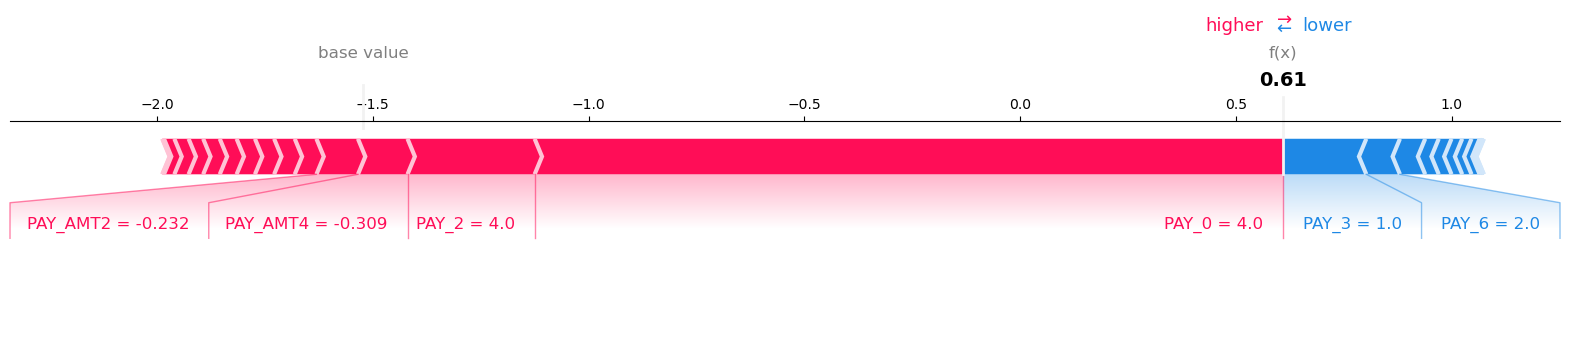

In [66]:
shap.force_plot(
    lgbm_explainer.expected_value[1],
    test_lgbm_shap_values[1][sample_has_default_payment, :],
    X_test_new_enc.iloc[sample_has_default_payment, :],
    matplotlib=True
)

2. We have a raw model score of 0.6093363667668253 ~= 0.61 as shown in the shap diagram. PAY_3 and PAY_6 are pushing the prediction towards the lower score (pushing to the left). On the other side of the scale, PAY_AMT2, PAY_AMT4, PAY_2, and PAY_0 are pushing the prediction towards the higher score (pushing to the right). These features (the ones pushing to the right) are heavily influencing the model to predict for class 1.

<!-- BEGIN QUESTION -->

## 12. Results on the test set <a name="12"></a>
<hr>

rubric={points:10}

**Your tasks:**

1. Try your best performing model on the test data and report test scores. 
2. Do the test scores agree with the validation scores from before? To what extent do you trust your results? Do you think you've had issues with optimization bias? 
3. Take one or two test predictions and explain these individual predictions (e.g., with SHAP force plots).  

<div class="alert alert-warning">
    
Solution_12
    
</div>

_Type your answer here, replacing this text._

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 13. Summary of results <a name="13"></a>
<hr>
rubric={points:12}

Imagine that you want to present the summary of these results to your boss and co-workers. 

**Your tasks:**

1. Create a table summarizing important results. 
2. Write concluding remarks.
3. Discuss other ideas that you did not try but could potentially improve the performance/interpretability . 
3. Report your final test score along with the metric you used at the top of this notebook in the [Submission instructions section](#si).

<div class="alert alert-warning">
    
Solution_13
    
</div>

_Type your answer here, replacing this text._

<!-- END QUESTION -->

<br><br>

<br><br>

<!-- BEGIN QUESTION -->

## (Optional) 14. Your takeaway <a name="15"></a>
<hr>
rubric={points:2}

**Your tasks:**

What is your biggest takeaway from the supervised machine learning material we have learned so far? Please write thoughtful answers.  

<div class="alert alert-warning">
    
Solution_14
    
</div>

<!-- END QUESTION -->

<br><br>

**PLEASE READ BEFORE YOU SUBMIT:** 

When you are ready to submit your assignment do the following:

1. Run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Clear All Outputs` and then `Run -> Run All Cells`. 
2. Notebooks with cell execution numbers out of order or not starting from "1" will have marks deducted. Notebooks without the output displayed may not be graded at all (because we need to see the output in order to grade your work).
4. Upload the assignment using Gradescope's drag and drop tool. Check out this [Gradescope Student Guide](https://lthub.ubc.ca/guides/gradescope-student-guide/) if you need help with Gradescope submission. 
5. Make sure that the plots and output are rendered properly in your submitted file. If the .ipynb file is too big and doesn't render on Gradescope, also upload a pdf or html in addition to the .ipynb so that the TAs can view your submission on Gradescope. 

Congratulations on finishing this project. This was a tricky one but you did it!

In [ ]:
from IPython.display import Image

Image("img/eva-well-done.png")